## Feedbacks visualization
Simple bar graph based on code from IH (the true OG).

In [1]:
import sys
# Add common resources folder to path
sys.path.append("/mnt/mcc-ns9600k/jonahks/git_repos/netcdf_analysis/Common/")
sys.path.append("/mnt/mcc-ns9600k/jonahks/git_repos/netcdf_analysis/")
sys.path.append("/home/jonahks/git_repos/netcdf_analysis/")
sys.path.append("/home/jonahks/git_repos/netcdf_analysis/Common/")

from imports import (
    pd, np, xr, mpl, plt, sns, os, 
    datetime, sys, crt, gridspec,
    ccrs, metrics, Iterable, re
    )

from functions import (
    masked_average, add_weights, sp_map,
    season_mean, get_dpm, leap_year, share_ylims,
    to_png, average_and_wrap, mute_ax
    )

from classes import SatComp_Metric, CT_SLF_Metric
from collections import deque
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Check running location and adjust working directory appropriately.

In [2]:
host = os.uname()[1]
if 'jupyter' in host.split('-'): # Check if running on NIRD through the Jupyter Hub
    print('Running through MC2 Jupyter Hub')
    model_dir = '/mnt/mcc-ns9600k/jonahks/'
    os.chdir(model_dir)

else:  # Assume that we're running on a local machine and mounting NIRD
    print('Running on %s, attempting to mount ns9600k/jonahks/ from NIRD' % str(host))
    os.system('fusermount -zu ~/drivemount/')  # unmount first
    os.system('sshfs jonahks@login.nird.sigma2.no:"p/jonahks/" ~/drivemount/')    # Calling mountnird from .bashrc doesn't work
    os.chdir('/home/jonahks/drivemount/')
    save_dir = '~/DATAOUT/'
    save_to = os.path.expanduser(save_dir)

output_dir = 'figures/'
case_dir = 'satcomp/'   # inconsistent label compared to jupy_test
fb_dir ='feedbacks_soden/mod_by_me/output_jonahks/'

# Check that each important directory can be accessed:    
access_paths = os.path.exists(output_dir) and os.path.exists(case_dir) and os.path.exists(fb_dir)
print('Can access all directory paths:', access_paths)

Running through MC2 Jupyter Hub
Can access all directory paths: True


In [3]:
from feedback_functions import *

### TOA Feedbacks

In [4]:
cases = os.listdir(fb_dir)
case_dict = {} # Cases are keys, feedback dictionaries are values


for _case in cases:
    if ("cm2000" in _case): # Filter SFC kernels    
        print(_case)
        case_dict[_case] = org_feedbacks_case(_case)

cm2000_def_slfout_cosp_1
cm2000_nifix2_slfout_cosp_1


In [5]:
# Testing something to order cases and label them.
label_dict = {}
label_dict['cm2000_def_slfout_cosp_1'] = "CESM2"
label_dict['cm2000_nifix2_slfout_cosp_1'] = "CESM2-NIfix2"

In [6]:
out = weight_feedbacks(case_dict,lat_range=[-90,90])

cm2000_def_slfout_cosp_1
cm2000_nifix2_slfout_cosp_1


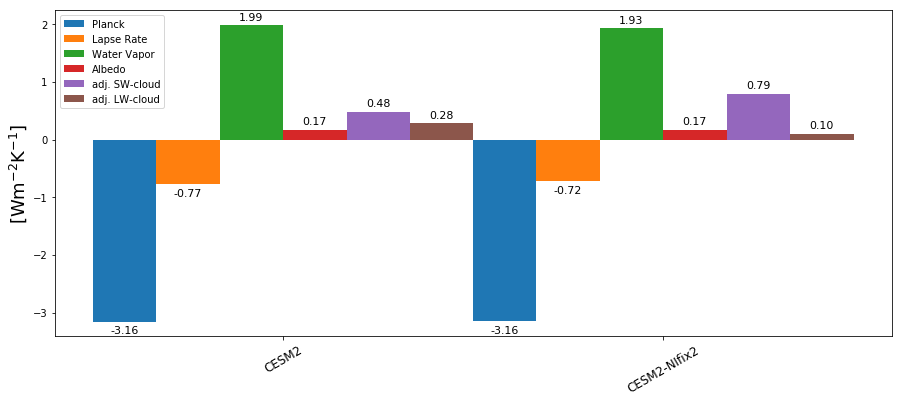

In [7]:
plt1 = barplot_feedbacks1(case_dict,out,labels=label_dict)

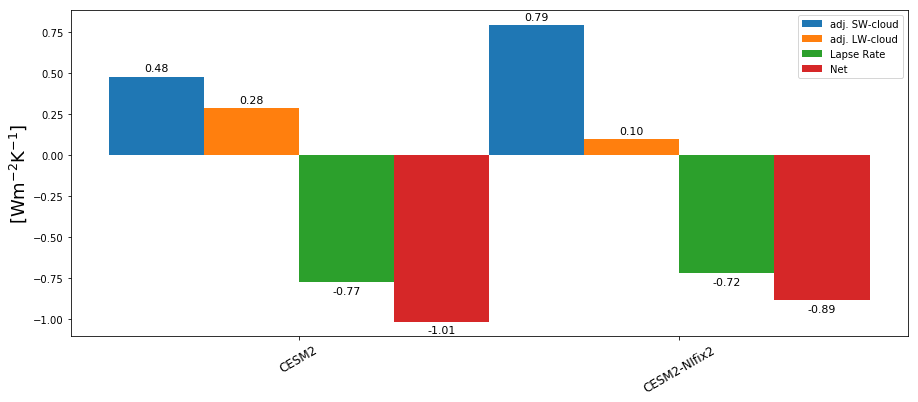

In [8]:
plt2 = barplot_feedbacks2(case_dict,out,labels=label_dict)

(<Figure size 576x432 with 1 Axes>,
 {'cm2000_def_slfout_cosp_1': array(0.47927519),
  'cm2000_nifix2_slfout_cosp_1': array(0.79388669)})

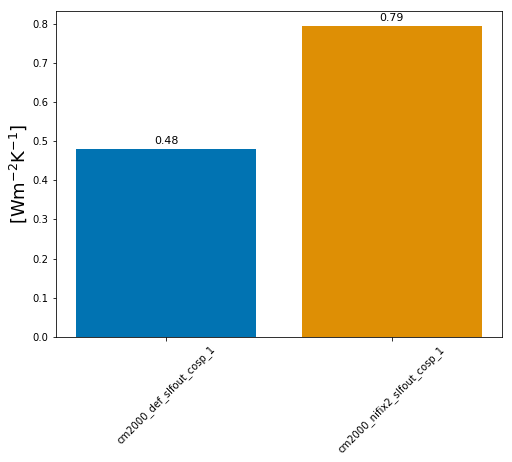

In [9]:
barplot_single(case_dict,out,'cloudsw_fb')

(<Figure size 576x432 with 1 Axes>,
 {'cm2000_def_slfout_cosp_1': array(0.284898),
  'cm2000_nifix2_slfout_cosp_1': array(0.09742354)})

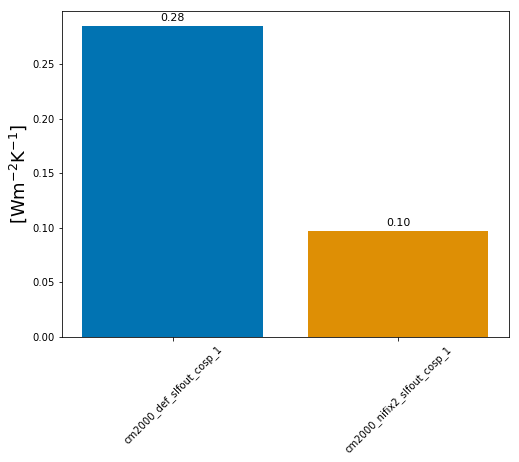

In [10]:
barplot_single(case_dict,out,'cloudlw_fb')

In [72]:
to_png(out[0],"CESM_nifix_feedbacks")

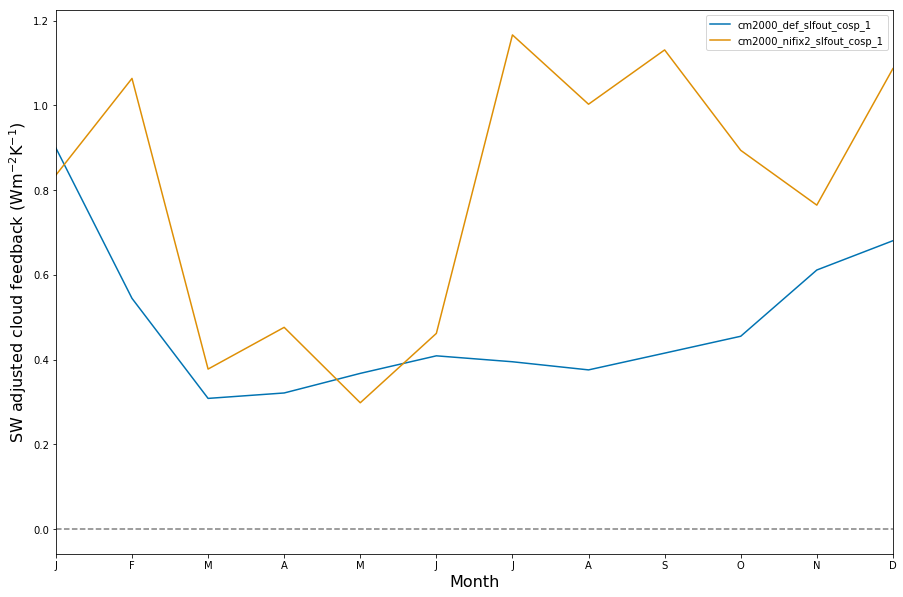

In [27]:
fig_out,axes_out = plot_months_line(case_dict,'fb_adj_cloud_sw',lat_range=[-90,90])
